In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import math
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
import geopy.distance
from scipy import stats
from scipy.integrate import quad
import seaborn as sns
import random

import pdb

In [3]:
# SAMPLING THE INITIAL PARAMETERS FOR SCENARIOS #
# However we now sample from KDE instead #

# generates a value of RMW (in nautical miles) using Kernel Density Estimate
def generate_sample_RMW():
    data = np.array([4.5, 5.5, 8.633, 10.039, 10.269, 8.757, 10.468, 7.29, 9.785, 8.673, 10.032, 
                   9.296, 9.815, 8.457, 7.582, 7.513, 7.363, 9.284, 10.362, 8.71, 9.382, 10.473, 
                   7.091, 9.757, 13.888, 13.685, 13.463, 12.62, 11.887, 12.938, 10.968, 12.124, 
                   12.04, 10.909, 11.443, 12.379, 10.659, 11.884, 13.203, 10.652, 20.899, 17.785, 
                   20.867, 17.981, 19.692, 20.449, 18.181, 18.754, 17.934, 18.929, 19.623, 17.881, 
                   18.585, 20.726, 19.57, 19.266, 20.818, 19.428, 17.913, 18.282, 19.636, 18.773, 
                   27.517, 26.665, 26.377, 26.425, 26.676, 24.7, 26.213, 27.55, 32.502, 32.31, 31.627, 
                   34.201, 34.559, 33.656, 34.168, 33.779, 32.28, 33.48, 33.612, 33.38, 35.914, 37.559, 
                   40.065, 39.424, 39.434, 40.855, 41.711, 39.613, 38.879, 40.521])
    # bw = 1. / np.std(data)
    g_kde = stats.gaussian_kde(dataset=data, bw_method=0.35)
    sample = g_kde.resample(1)
    value = sample[0][0]
    if (value < 0.5):
        return 0.5;
    
    return value,data

# generates a value of RS (in nautical miles) using Kernel Density Estimate
def generate_sample_RS():
    data = np.array([125.905, 144.917, 140.757, 141.08, 125.112, 134.245, 140.044, 
                   149.898, 144.786, 138.548, 163.761, 168.162, 176.488, 180.591, 
                   222.465, 222.429, 200.777, 215.574, 241.822, 246.177, 246.968, 
                   239.157, 232.497, 233.106, 238.579, 234.642, 245.754, 236.565, 
                   246.414, 229.196, 234.342, 225.049, 227.999, 252.837, 258.687, 
                   274.109, 268.347, 263.399, 258.522, 291.296, 298.1, 287.079, 292.886, 
                   277.824, 286.143, 279.59, 277.853, 321.407, 322.538, 320.277, 311.371, 
                   305.598, 324.98, 332.034, 335.154, 331.389, 343.105, 349.919, 339.735, 
                   356.333, 373.597, 357.31, 360.001, 356.86, 367.073])
    bw = 1. / np.std(data)
    g_kde = stats.gaussian_kde(dataset=data, bw_method=0.35)
    sample = g_kde.resample(7)
    value = sample[0]

    return value,data

# generates a value of WM (in knots) using Kernel Density Estimate
def generate_sample_WM():
    data = np.array([100.249, 102.907, 104.016, 103.428, 101.597, 105.601, 100.342, 101.32, 
                   101.947, 101.754, 103.18, 105.719, 104.022, 102.299, 100.566, 104.039, 
                   102.868, 104.885, 103.966, 100.543, 102.881, 103.439, 103.504, 104.424, 
                   105.782, 102.982, 103.86, 103.001, 101.555, 105.739, 105.688, 102.446, 
                   102.552, 102.863, 101.022, 103.733, 103.248, 100.832, 101.671, 104.6, 
                   100.478, 101.967, 100.516, 104.504, 104.821, 102.403, 105.345, 104.873, 
                   107.237, 109.737, 106.047, 111.458, 109.363, 106.038, 111.275, 109.977, 
                   106.432, 106.404, 110.429, 107.832, 116.77, 113.746, 113.014, 112.545, 
                   115.294, 116.933, 120.623, 121.423, 126.301, 125.773, 128.938, 125.39, 
                   125.444, 125.082, 126.626, 125.045, 141.2, 143.0, 145])
    # bw = 1. / np.std(data)
    g_kde = stats.gaussian_kde(dataset=data, bw_method=0.35)
    sample = g_kde.resample(1)
    value = sample[0][0]
    
    return value,data

In [4]:
# obtain data from the above functions
_, data_rmw = generate_sample_RMW()
_, data_rs = generate_sample_RS()
_, data_wm = generate_sample_WM()

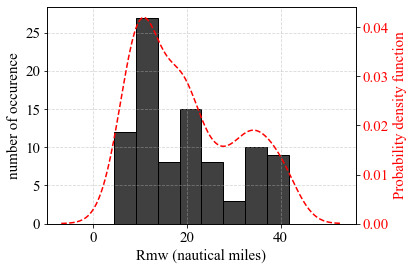

In [21]:
#################### KDE plot for rmw ###################################
fig, ax1 = plt.subplots()
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 15
plt.grid(linestyle='--', alpha=0.5)

color = 'k'
ax1.set_xlabel('Rmw (nautical miles)')
ax1.set_ylabel('number of occurence', color=color)
sns.histplot(data_rmw, color=color, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 15
color = 'r'
ax2.set_ylabel('Probability density function', color=color)  # we already handled the x-label with ax1
sns.kdeplot(data_rmw,color=color,ax=ax2,linestyle="--",bw_method=0.35)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Rmw_kde.png',dpi=300)
plt.show()

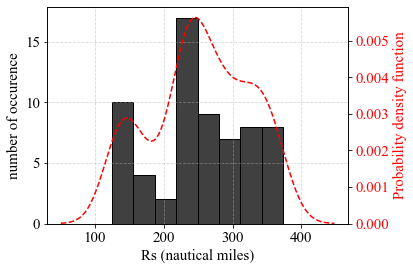

In [22]:
#################### KDE plot for rs ###################################
fig, ax1 = plt.subplots()
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 15
plt.grid(linestyle='--', alpha=0.5)

color = 'k'
ax1.set_xlabel('Rs (nautical miles)')
ax1.set_ylabel('number of occurence', color=color)
sns.histplot(data_rs, color=color, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 15
color = 'r'
ax2.set_ylabel('Probability density function', color=color)  # we already handled the x-label with ax1
sns.kdeplot(data_rs,color=color,ax=ax2,linestyle="--",bw_method=0.35)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Rs_kde.png',dpi=300)
plt.show()

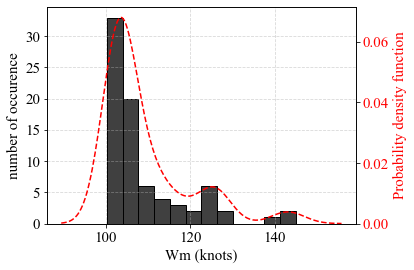

In [23]:
#################### KDE plot for wm ###################################
fig, ax1 = plt.subplots()
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 15
plt.grid(linestyle='--', alpha=0.5)

color = 'k'
ax1.set_xlabel('Wm (knots)')
ax1.set_ylabel('number of occurence', color=color)
sns.histplot(data_wm, color=color, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 15
color = 'r'
ax2.set_ylabel('Probability density function', color=color)  # we already handled the x-label with ax1
sns.kdeplot(data_wm,color=color,ax=ax2,linestyle="--",bw_method=0.35)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('Wm_kde.png',dpi=300)
plt.show()

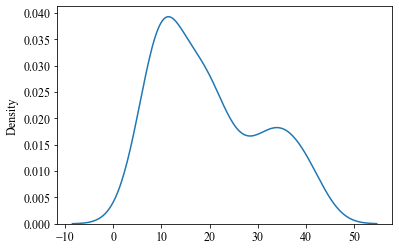

In [24]:
# obtain KDE vector for rmw 
RMW_values, _ = sns.kdeplot(data_rmw).lines[0].get_data()
RMW_KDE = [i for i in RMW_values if i>5 and i<42]

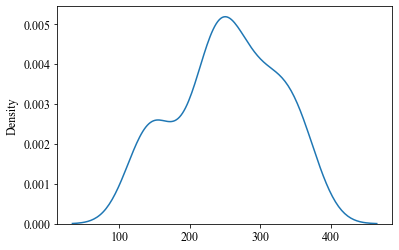

In [25]:
# obtain KDE vector for rs 
RS_values, _ = sns.kdeplot(data_rs).lines[0].get_data()
RS_KDE = [j for j in RS_values if j>100 and j<400]

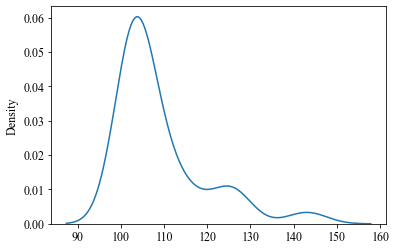

In [26]:
# obtain KDE vector for ww
# for some reason getting kde in a single cell did not work in the Jupyter so we had to separate cells for each
WM_values, _ = sns.kdeplot(data_wm).lines[0].get_data()
WM_KDE = [k for k in WM_values if k>100 and k<150]

129.62247485906036


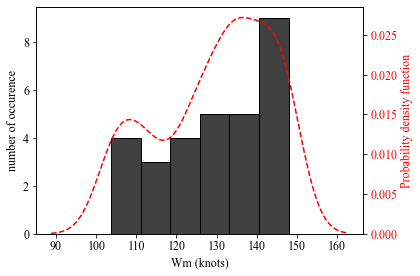

In [27]:
import random
np.random.seed(0)
random.seed(0)
xxx = random.sample(WM_KDE, 30)
print(np.mean(xxx))

fig, ax1 = plt.subplots()
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

color = 'k'
ax1.set_xlabel('Wm (knots)')
ax1.set_ylabel('number of occurence', color=color)
sns.histplot(xxx, color=color, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'r'
ax2.set_ylabel('Probability density function', color=color)  # we already handled the x-label with ax1
sns.kdeplot(xxx,color=color,ax=ax2,linestyle="--",bw_method=0.35)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [28]:
# READING IN DATA FOR BUSES AND LINES
# read in data and reduce columns
# busdata_raw = pd.read_csv('/content/drive/My Drive/WSU Summer Internship/Texas2000busdata-BUS.txt', sep='\s+' )
busdata_raw = pd.read_csv('Texas2000busdata-BUS.txt', sep='\s+' )

busdata = busdata_raw[['BusNum', 'BusName', 'Latitude:1', 'Longitude:1']]
busdata['voltage'] = busdata_raw.drop_duplicates()['BusNomVolt']
busdata = busdata.set_index('BusNum')
busdata = busdata.append(pd.Series(name=np.NaN))

# linedata_raw = pd.read_csv('/content/drive/My Drive/WSU Summer Internship/Texas2000busdata-LINES.txt', sep='\s+' )
linedata_raw = pd.read_csv('Texas2000busdata-LINES.txt', sep='\s+' )
linedata = linedata_raw[['BusNum','BusNum:1']]
linedata = linedata.drop_duplicates().reset_index().drop('index', axis=1 )
linedata['NaN'] = np.NaN

# 'pairs' organizes transmission lines into stacked DataFrame in the form:
# FROM BusNum
# TO BusNum:1
# NaN (to separate each pair)
pairs = linedata.stack(dropna=False).reset_index().drop(['level_0','level_1'], axis=1)

longitudes = busdata['Longitude:1'][pairs[0][:]]
latitudes = busdata['Latitude:1'][pairs[0][:]]

# linedata['LineID']= linedata['BusNum'].astype(str) + '-' + linedata['BusNum:1'].astype(str)
# linedata.set_index('LineID')

linedata ['from(X,Y)'] = list(zip(busdata['Longitude:1'][linedata['BusNum']],busdata['Latitude:1'][linedata['BusNum']]))
linedata ['to(X,Y)'] = list(zip(busdata['Longitude:1'][linedata['BusNum:1']],busdata['Latitude:1'][linedata['BusNum:1']]))
busdata[:]['voltage']
volts = []
for i in linedata['BusNum']:
  volts.append(busdata['voltage'][i])
linedata['voltage'] = volts

# test
linedatatest = linedata[['BusNum','voltage']].copy().drop_duplicates()
linedatatest = linedatatest.set_index('BusNum')
for i in linedata ['BusNum']:
  if linedatatest['voltage'][i] != busdata['voltage'][i]:
    print('voltage ERROR', i)
    
# creates dataframes for each voltage level in grid
voltageI = linedata['voltage']
voltageI=[np.int16(x) for x in voltageI]
linedata['voltage']=voltageI

linedata_ByVoltage = [1,2,3,4]

voltageLevels = linedata['voltage'].unique()
for i in range(len(voltageLevels)):
  df = linedata[linedata['voltage']==voltageLevels[i]]
  linedata_ByVoltage[i] = df.filter(items=['BusNum', 'BusNum:1', 'NaN'])
linedata_115v = linedata_ByVoltage[0]
linedata_230v = linedata_ByVoltage[1]
linedata_500v = linedata_ByVoltage[2]
linedata_161v = linedata_ByVoltage[3]

pairs115 = linedata_115v.stack(dropna=False).reset_index().drop(['level_0','level_1'], axis=1)
pairs230 = linedata_230v.stack(dropna=False).reset_index().drop(['level_0','level_1'], axis=1)
pairs500 = linedata_500v.stack(dropna=False).reset_index().drop(['level_0','level_1'], axis=1)
pairs161 = linedata_161v.stack(dropna=False).reset_index().drop(['level_0','level_1'], axis=1)

figlist = [pairs115, pairs230, pairs500, pairs161]
colors = ['Blue', 'Red', 'Purple', 'Green']

MWs_1 = []
MWs_2 = []
MWs_3 = []

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


In [29]:
# POWER DISTRUBTION MODEL FUNCTIONS

B = 10
K = 1.14
α = 0.04 

# computes cases for computing distance between point and line segment (intermediate step for computing dmin)
def pDistance(x, y, x1, y1, x2, y2):
  A = x - x1
  B = y - y1
  C = x2 - x1
  D = y2 - y1

  dot = A * C + B * D
  len_sq = C * C + D * D
  param = -1
  if (len_sq != 0):
      param = dot / len_sq

  if (param < 0):
    return 2
  elif (param > 1):
    return 3
  else:
    return 1

# distance function
def distance(c_xval, c_yval, x_xval, x_yval):
  # calculate nautical mile distance between two coordinate points (latitude, longitude)
  coords_1 = (c_yval, c_xval)
  coords_2 = (x_yval, x_xval)
  return geopy.distance.distance(coords_1, coords_2).nm

# gradient wind field
def w(dist, rmw, rs, wm, Ξ, Ψ):
  if dist >= 0 and dist < rmw:
    ans = (Ξ*(1 - np.exp(-1*Ψ*dist)))
  elif dist >= rmw and dist <= rs:
    ans = wm*np.exp(-1*(np.log(B)/(rs-rmw))*(dist-rmw))
  else:
    ans = 0
  return ans;

# takes in coordinates for hurricane eye, transmission pole 'A' and 'B' in a list/array of the form (x,y)
# returns minimum distance, maximum distance
def dminmax(eye, A, B):
  a, b, c = distance(eye[0], eye[1], B[0], B[1]), distance(A[0], A[1], eye[0], eye[1]), distance(A[0], A[1], B[0], B[1])
  s = (a+b+c)/2.0
  Area = math.sqrt(s*(s-a)*(s-b)*(s-c))
  case = pDistance(eye[0], eye[1], A[0], A[1], B[0], B[1])
  if (case == 1):
    d_min = (2*Area)/c
  else:
    d_min = min(a,b) 

  if a>=b:
    d_max = a
  else:
    d_max = b
  return d_min, d_max

# implements Hurricane Impact Matrix using coordinates for dminmax() function...
# and variables to generate gradient wind field function passed in the form m_h = [r_mw, r_s, w_m]
# i.e. each hurricane j is defined in the HIM by its m_h values
def HIM(eye, transpostA, transpostB, m_h):
  r_mw, r_s, w_m, Ξ, Ψ = m_h[:]
  d_min, d_max = dminmax(eye, transpostA, transpostB)
  if d_min<=r_mw<=d_max:
    windspeed = w_m
  else:
    windspeed = max(w(d_min, r_mw, r_s, w_m, Ξ, Ψ), w(d_max, r_mw, r_s, w_m, Ξ, Ψ))
  return windspeed

In [44]:
def plot_data(scen_dir, result, scen, track, index):    
    hours = index*2

    plt.figure(index)

    # Set the figure size, projection, and extent
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-107.5,-92.5,25.0,37.0])
    ax.add_feature(cfeature.LAND, color='white')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor='black')
    ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black')
    ax.coastlines(resolution="50m",linewidth=1)
    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.5, color='black', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([-107.5,-105.0,-102.5,-100.0,-97.5,-95.0,-92.5])
    gl.ylocator = mticker.FixedLocator([25,27.5,30.0,32.5,35.0,37.0])


    # Plot windspeed
    clevs = np.arange(0,150,1)
    plt.contourf(x1, x2, result, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
    plt.title('t=' + str(hours) +' hrs, trck=' + str(track) + ', scnr=' + str(scen), size=16)
    cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
    cb.set_label('Wind Speed (knots)',size=10,rotation=90,labelpad=5)
    cb.ax.tick_params(labelsize=10)

    custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
    Line2D([0], [0], color=colors[1], lw=4),
    Line2D([0], [0], color=colors[2], lw=4),
    Line2D([0], [0], color=colors[3], lw=4)]

    for count, i in enumerate(figlist):
        plt.plot(busdata['Longitude:1'][i[0][:]], busdata['Latitude:1'][i[0][:]], color=colors[count], linewidth=0.5)
    plt.legend(custom_lines, ['115v', '230v', '500v', '161v'])
    plt.savefig(scen_dir + '/t=' + str(hours) +' hrs.png',dpi=600,bbox_inches='tight', edgecolor='white',facecolor='white')
    plt.close()

# calculation for land fall location
def landfall_wind_field(x1,x2,hurricanePath):
    global B_pressure
    global P
    global rmw
    global wm
    global rs
    global rs_path
    global Ξ 
    global Ψ
    global MWs_1
    global MWs_2
    global MWs_3
    
#     random.seed(0)
#     np.random.seed(0)
    
    # revise x1 and x2 to account for the eye of the hurricane
    # radius of maximum wind (nautical miles)
    # rmw, _ = generate_sample_RMW()
    rmw = random.choice(RMW_KDE)
    if (rmw > 43.5):
        rmw = 43.5

    # maximum sustained wind (knots)
    # wm, _ = generate_sample_WM()
    wm = random.choice(WM_KDE)

    # radius of smallest wind (nautical miles)
    # rs_path, _ = generate_sample_RS()
    rs_path = random.choice(RS_KDE)
    
    # given parameters
    B = 10
    K = 1.14
    α = 0.04    
    
    Ξ = K * wm
    Ψ = 1/(rmw)*math.log(K/(K-1))
    P = math.sqrt((2.636 + 0.0394899 * eyeY - math.log(rmw))/0.0005086)
    B_pressure = 1.38 + 0.00184*P - 0.00309*rmw

    Olat = eyeY
    Olon = eyeX
    Dlat = x2
    Dlon = x1

    # Calculating distance to center
    d = 3440.  # nautical miles
    d_lat = np.radians(Dlat - Olat)
    d_lon = np.radians(Dlon - Olon)
    a = (np.sin(d_lat / 2.) * np.sin(d_lat / 2.) +
         np.cos(np.radians(Olat)) * np.cos(np.radians(Dlat)) *
         np.sin(d_lon / 2.) * np.sin(d_lon / 2.))
    c = 2. * np.arctan2(np.sqrt(a), np.sqrt(1. - a))
    radius = d * c
    
    m_h = [rmw, rs_path, wm, Ξ, Ψ]
    eye = [hurricanePath[0][0], hurricanePath[0][1]]    
    imps = []
    for i in linedata.index:
        imps.append(HIM(eye, linedata['from(X,Y)'][i], linedata['to(X,Y)'][i], m_h))
    # MWs.append(imps)
    wind_each_TL = imps
    result = np.piecewise(radius, [(radius >= 0) & (radius < rmw), (radius >= rmw) & (radius <= rs_path), radius > rs_path], [lambda radius: (Ξ*(1 - np.exp(-1*Ψ*radius))), lambda radius: wm*np.exp(-1*(np.log(B)/(rs_path-rmw))*(radius-rmw)),lambda radius: -1])

    return result, wind_each_TL

def dynamic_wind_field(index, hurricanePath):  
    global B_pressure
    global P
    global rmw
    global wm
    global rs
    global Ξ
    global Ψ
    global MWs_1
    global MWs_2
    global MWs_3
    
    # given parameters
    B = 10
    K = 1.14
    α = 0.04

    hours = index * 2

    P_eye = P * math.exp(-1* α *hours)

    latitude = hurricanePath[index][1]
    rmw = math.exp(2.636 - 0.0005086*P_eye*P_eye + 0.0394899*latitude)
    B_pressure_eye = 1.38 + 0.00184*P_eye - 0.00309*rmw
    wm = wm*math.sqrt((B_pressure_eye*P_eye)/(B_pressure*P))
#     rs = rs_path[index]
    rs = random.choice(RS_KDE)

    Ξ = K * wm
    Ψ = 1/(rmw)*math.log(K/(K-1))

    m_h = [rmw, rs, wm, Ξ, Ψ]
    eye = [hurricanePath[index][0], hurricanePath[index][1]]

    imps = []
    for i in linedata.index:
        imps.append(HIM(eye, linedata['from(X,Y)'][i], linedata['to(X,Y)'][i], m_h))
    # MWs.append(imps)
    wind_each_TL = imps

    Olat = hurricanePath[index][1]
    Olon = hurricanePath[index][0]
    Dlat = x2
    Dlon = x1

    # Calculating distance to center
    d = 3440.  # nautical miles

    d_lat = np.radians(Dlat - Olat)
    d_lon = np.radians(Dlon - Olon)
    a = (np.sin(d_lat / 2.) * np.sin(d_lat / 2.) +
         np.cos(np.radians(Olat)) * np.cos(np.radians(Dlat)) *
         np.sin(d_lon / 2.) * np.sin(d_lon / 2.))
    c = 2. * np.arctan2(np.sqrt(a), np.sqrt(1. - a))
    radius = d * c

    result = np.piecewise(radius, [(radius >= 0) & (radius < rmw), (radius >= rmw) & (radius <= rs), radius > rs], [lambda radius: (Ξ*(1 - np.exp(-1*Ψ*radius))), lambda radius: wm*np.exp(-1*(np.log(B)/(rs-rmw))*(radius-rmw)),lambda radius: -1])

    return result, wind_each_TL

def plot_scatter(time, line, probability):
    plt.xlabel('Transmission Line #')
    plt.ylabel('Outage Probability'+str(time+1))
    plt.scatter(line, probability)
    plt.show()

In [51]:
import os

# x and y coordinates of the eye of the hurricane
eyeX = -95.2
eyeY = 28.9

# Longitude: -107.5 to -92.5
# Latitude: 25.0 to 37.0
x1 = np.arange(-107.5,-92.5,0.05)
x2 = np.arange(25.0,37.0,0.05)
x1, x2 = np.meshgrid(x1, x2)

# hurricane tracks for t = 0 hrs to t = 12 hrs
hurricanePath_1 = [[-95.2, 28.9], [-95.3, 29.14], [-95.40, 29.39], [-95.51, 29.63], [-95.61, 29.88], 
                   [-95.71, 30.12], [-95.82, 30.37]]
hurricanePath_2 = [[-95.2, 28.9], [-95.35, 29.13], [-95.50, 29.35], [-95.65, 29.58], [-95.8, 29.80], 
                   [-95.95, 30.03], [-96.1, 30.25]]
hurricanePath_3 = [[-95.2, 28.9], [-95.39, 29.1], [-95.58, 29.3], [-95.78, 29.5], [-95.97, 29.7], 
                   [-96.17, 29.89], [-96.36, 30.09]]

# combine the paths on a list
hurricane = [hurricanePath_1] + [hurricanePath_2] + [hurricanePath_3]


number_of_scenarios = 30
time_period = 7
number_of_tracks = 3

output_path = "results/"
for tracks in range(number_of_tracks):
    
    # make each dir for tracks
    track_path = output_path + 'track' + str(tracks)
    os.mkdir(track_path)
    
    for scens in range(number_of_scenarios):
        # make each dir for scenarios
        scen_dir = track_path + '/scen' + str(scens)
        os.mkdir(scen_dir)
       
        # landfall
        result, wind_each_TL = landfall_wind_field(x1,x2, hurricane[tracks])
        
        # wind plots and probability for landfall
        wind_each_TL = np.array(wind_each_TL)
        outage_probability = np.piecewise(wind_each_TL, [wind_each_TL <= 48.59, (wind_each_TL > 48.59) & (wind_each_TL < 106.91), wind_each_TL >= 106.91], [lambda wind_each_TL: 0, lambda wind_each_TL: (wind_each_TL - 48.59) / (106.91 - 48.59), lambda wind_each_TL: 1])
        
        #save results
        plot_data(scen_dir, result, scens, tracks, index=0,)   
        np.savetxt(scen_dir + '/time_0.csv',outage_probability)
        
        # dynamic calculation
        for time in range(time_period - 1):
            
            # wind field at each of the tracks
            result, wind_each_TL = dynamic_wind_field(time + 1, hurricane[tracks])
            
            # wind plots and probability for landfall
            wind_each_TL = np.array(wind_each_TL)
            outage_probability = np.piecewise(wind_each_TL, [wind_each_TL <= 48.59, (wind_each_TL > 48.59) & (wind_each_TL < 106.91), wind_each_TL >= 106.91], [lambda wind_each_TL: 0, lambda wind_each_TL: (wind_each_TL - 48.59) / (106.91 - 48.59), lambda wind_each_TL: 1])

            #save results
            plot_data(scen_dir, result, scens, tracks, time + 1)   
            np.savetxt(scen_dir + '/time_' + str(time+1)+'.csv',outage_probability)

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings

c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\users\poudyal\anaconda3\envs\texas\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings